In [2]:
import os, shutil
import time
import datetime
from keras.callbacks import ModelCheckpoint
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras.callbacks import EarlyStopping
from keras import layers
from keras import models
from keras.models import load_model
from keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
from sklearn.metrics import confusion_matrix
import cv2

Using TensorFlow backend.


In [2]:
model = load_model('transfer_learning_unfreeze_6127.h5')

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.


In [15]:
model2 = load_model('66412.h5', compile=False)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [4]:
train_dir = 'fer2013/Training'
validation_dir = 'fer2013/Validation/'
test_dir = 'fer2013/Test'

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        target_size=(200, 200),
#         target_size=(150,150),
#         batch_size=28709,
        batch_size=200,
        class_mode='categorical')


test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(200,200),
#         target_size=(150,150),
#         batch_size=3589,
        batch_size=200,
        shuffle=False,
        class_mode=None)

Found 28709 images belonging to 7 classes.
Found 3589 images belonging to 1 classes.


In [5]:
train_generator.class_indices

{'0': 0, '1': 1, '2': 2, '3': 3, '4': 4, '5': 5, '6': 6}

In [6]:
pred = model.predict_generator(test_generator, steps=len(test_generator), verbose=1)
print('Generated {} predictions'.format(len(pred)))

18/18 [==============================] - 13s 733ms/step
Generated 3589 predictions


In [7]:
predicted_class_indices=np.argmax(pred,axis=1)

In [8]:
labels = (train_generator.class_indices)
labels = dict((v,k) for k,v in labels.items())
predictions = [labels[k] for k in predicted_class_indices]

In [10]:
filenames=test_generator.filenames
results=pd.DataFrame({"Filename":filenames,
                      "Predictions":predictions})

In [12]:
results.head()

,Filename,Predictions
0,pred\PublicTest_10014026.jpg,2
1,pred\PublicTest_10026932.jpg,3
2,pred\PublicTest_10037780.jpg,0
3,pred\PublicTest_10046633.jpg,0
4,pred\PublicTest_10124402.jpg,2


In [13]:
results['Predictions'].replace({'0':'Angry', '1':'Disgust', '2':'Fear', '3':'Happy', '4':'Sad', '5':'Surprise', '6':'Neutral'},
                               inplace=True)

In [14]:
results.head(10)

,Filename,Predictions
0,pred\PublicTest_10014026.jpg,Fear
1,pred\PublicTest_10026932.jpg,Happy
2,pred\PublicTest_10037780.jpg,Angry
3,pred\PublicTest_10046633.jpg,Angry
4,pred\PublicTest_10124402.jpg,Fear
5,pred\PublicTest_10148992.jpg,Happy
6,pred\PublicTest_10150773.jpg,Sad
7,pred\PublicTest_10169002.jpg,Fear
8,pred\PublicTest_10200084.jpg,Angry
9,pred\PublicTest_10215132.jpg,Sad


In [83]:
##ORIGINAL
# def predictoneimage_cnn(model, path):
# #     img = load_img(path, target_size=(150, 150))
#     img = load_img(path, target_size=(200,200))
#     plt.imshow(img)
#     img = img_to_array(img)
#     img = img/255
#     img = np.expand_dims(img, axis=0)
#     predict = model.predict(img)
# #     print("Angry, Disgust, Fear, Happy, Sad, Surprise, Neutral")
    
#     predicted_class_indices = np.argmax(predict, axis=1)
#     labels = (train_generator.class_indices)
#     labels = dict((v,k) for k,v in labels.items())
#     predictions = [labels[k] for k in predicted_class_indices]
#     return predict, print(predictions)

In [88]:
train_generator.class_indices

{'0': 0, '1': 1, '2': 2, '3': 3, '4': 4, '5': 5, '6': 6}

### function that shows image and predicts emotion based on loaded model

In [17]:
def predictoneimage_cnn(model, path):
#     img = load_img(path, target_size=(150, 150))
    img = load_img(path, target_size=(200,200))
    plt.imshow(img)
    img = img_to_array(img)
    img = img/255
    img = np.expand_dims(img, axis=0)
    predict = model.predict(img)
    
    emotions = ["Angry","Disgust","Scared", "Happy", "Sad", "Surprised","Neutral"]
    emotion_prob = np.max(predict)
    label = emotions[predict.argmax()]
    return predict, print(label)



In [23]:
def predicttwo(model, path):
    img = load_img(path, target_size=(150, 150))
#     img = load_img(path, target_size=(200,200))
    plt.imshow(img)
    img = img_to_array(img)
    img = img/255
    img = np.expand_dims(img, axis=0)
    predict = model.predict(img)
    
    emotions = ["Angry","Disgust","Scared", "Happy", "Sad", "Surprised","Neutral"]
    emotion_prob = np.max(predict)
    label = emotions[predict.argmax()]
    return predict, print(label)



In [18]:
np.set_printoptions(suppress=True)
np.set_printoptions(precision=5)

In [19]:
np.set_printoptions(precision=5)

Sad


(array([[0.01824, 0.     , 0.     , 0.     , 0.98176, 0.     , 0.     ]],
       dtype=float32), None)

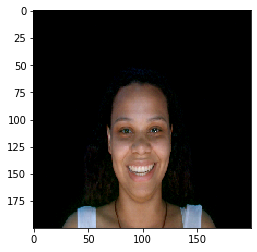

In [100]:
predictoneimage_cnn(model, 'data/happy/s002-01_img.tif')
#Angry, Disgust, Fear, Happy, Sad, Surprise, Neutral

Sad


(array([[0.21946, 0.00392, 0.00659, 0.03451, 0.58133, 0.00804, 0.14615]],
       dtype=float32), None)

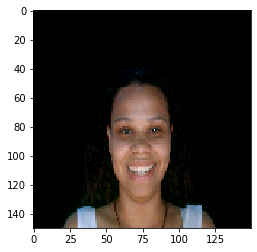

In [24]:
predicttwo(model2, 'data/happy/s002-01_img.tif')
#Angry, Disgust, Fear, Happy, Sad, Surprise, Neutral

Sad


(array([[0.0003 , 0.     , 0.     , 0.     , 0.65714, 0.11794, 0.22461]],
       dtype=float32), None)

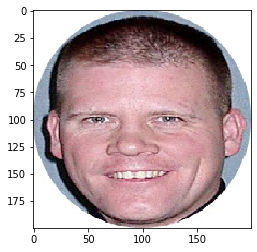

In [101]:
predictoneimage_cnn(model, 'wilmabainbridge/Images/Aaron Booth_5_oval.jpg')
# C:\Users\whohuhwhat\Desktop\emotions\wilmabainbridge\10k US Adult Faces Database\Face Images\Aaron Booth_5_oval.jpg

Happy


(array([[0.00003, 0.     , 0.     , 0.99172, 0.00004, 0.     , 0.00821]],
       dtype=float32), None)

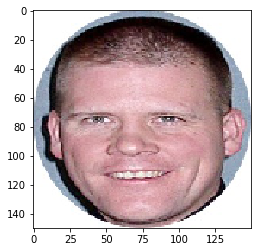

In [25]:
predicttwo(model2, 'wilmabainbridge/Images/Aaron Booth_5_oval.jpg')
# C:\Users\whohuhwhat\Desktop\emotions\wilmabainbridge\10k US Adult Faces Database\Face Images\Aaron Booth_5_oval.jpg

Sad


(array([[0., 0., 0., 0., 1., 0., 0.]], dtype=float32), None)

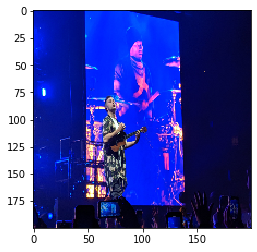

In [102]:
predictoneimage_cnn(model, 'tyler.jpg')

Sad


(array([[0.0502 , 0.00002, 0.04382, 0.00015, 0.78934, 0.00014, 0.11633]],
       dtype=float32), None)

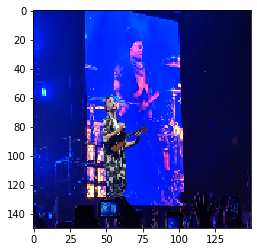

In [26]:
predicttwo(model2, 'tyler.jpg')

Neutral


(array([[0.0002 , 0.     , 0.02896, 0.00005, 0.00272, 0.00776, 0.96032]],
       dtype=float32), None)

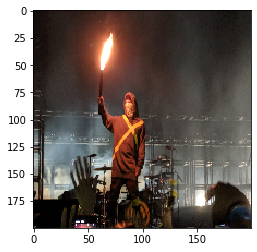

In [103]:
predictoneimage_cnn(model, 'ban.jpg')
# print('Angry, Disgust, Fear, Happy, Sad, Surprise, Neutral')

Happy


(array([[0.06095, 0.00024, 0.01292, 0.45507, 0.06717, 0.00235, 0.4013 ]],
       dtype=float32), None)

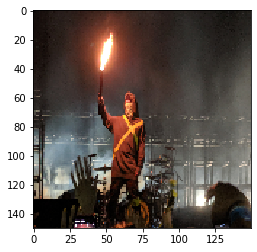

In [27]:
predicttwo(model2, 'ban.jpg')

In [23]:
ban

array([[0.0002 , 0.     , 0.02896, 0.00005, 0.00272, 0.00776, 0.96032]],
      dtype=float32)

Sad


(array([[0.     , 0.     , 0.00002, 0.     , 0.99998, 0.     , 0.     ]],
       dtype=float32), None)

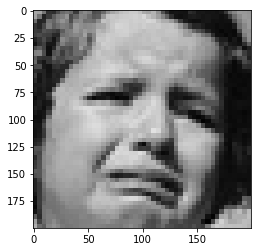

In [104]:
predictoneimage_cnn(model, 'fer2013/Test/Pred/PublicTest_5425294.jpg')

Sad


(array([[0.01095, 0.00036, 0.00232, 0.00056, 0.97134, 0.00027, 0.01419]],
       dtype=float32), None)

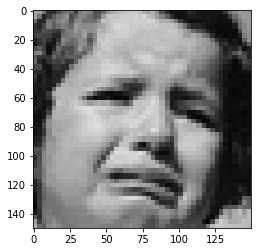

In [28]:
predicttwo(model2, 'fer2013/Test/Pred/PublicTest_5425294.jpg')

Surprised


(array([[0.00079, 0.     , 0.0002 , 0.00002, 0.     , 0.99899, 0.     ]],
       dtype=float32), None)

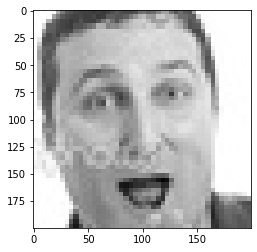

In [105]:
predictoneimage_cnn(model, 'fer2013/Test/Pred/PublicTest_8843901.jpg')

Surprised


(array([[0.     , 0.     , 0.00038, 0.     , 0.     , 0.99962, 0.     ]],
       dtype=float32), None)

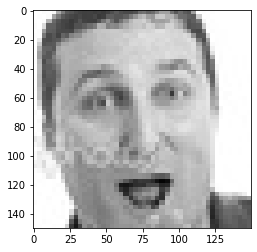

In [29]:
predicttwo(model2, 'fer2013/Test/Pred/PublicTest_8843901.jpg')

Surprised


(array([[0., 0., 0., 0., 0., 1., 0.]], dtype=float32), None)

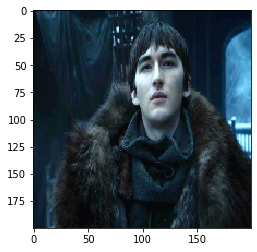

In [106]:
predictoneimage_cnn(model, 'bran.jpg')

Sad


(array([[0.04401, 0.00004, 0.18065, 0.00053, 0.5479 , 0.0025 , 0.22436]],
       dtype=float32), None)

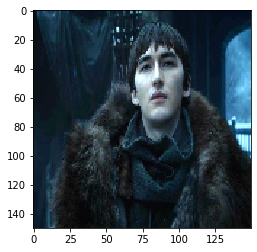

In [30]:
predicttwo(model2, 'bran.jpg')

Sad


(array([[0., 0., 0., 0., 1., 0., 0.]], dtype=float32), None)

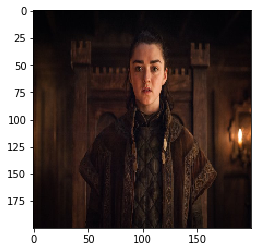

In [107]:
predictoneimage_cnn(model, 'arya.jpg')

Scared


(array([[0.01116, 0.     , 0.66574, 0.00002, 0.32123, 0.00004, 0.00181]],
       dtype=float32), None)

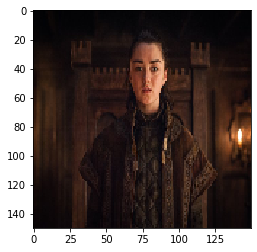

In [31]:
predicttwo(model2, 'arya.jpg')

Neutral


(array([[0.     , 0.     , 0.00027, 0.     , 0.     , 0.02825, 0.97148]],
       dtype=float32), None)

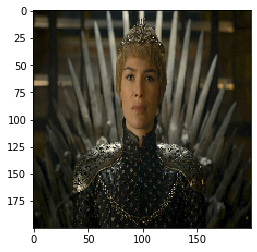

In [108]:
predictoneimage_cnn(model, 'cersei.jpg')

Sad


(array([[0.00003, 0.     , 0.0001 , 0.00006, 0.95885, 0.     , 0.04096]],
       dtype=float32), None)

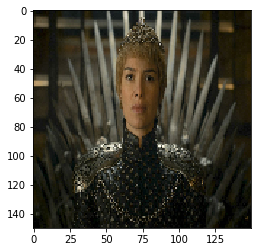

In [32]:
predicttwo(model2, 'cersei.jpg')

In [ ]:
predictoneimage_cnn(model, 'drogon.jpg')

In [ ]:
predicttwo(model2, 'drogon.jpg')

Sad


(array([[0., 0., 0., 0., 1., 0., 0.]], dtype=float32), None)

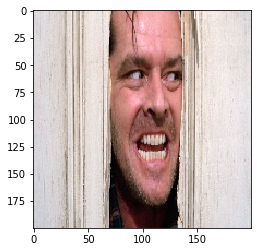

In [109]:
predictoneimage_cnn(model, 'shining.jpg')

Angry


(array([[0.60886, 0.00084, 0.32601, 0.00328, 0.03426, 0.00061, 0.02614]],
       dtype=float32), None)

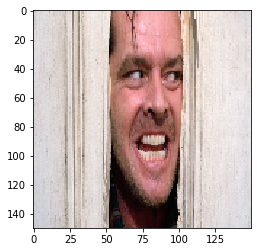

In [33]:
predicttwo(model2, 'shining.jpg')

Sad


(array([[0.00001, 0.     , 0.00007, 0.     , 0.99992, 0.     , 0.     ]],
       dtype=float32), None)

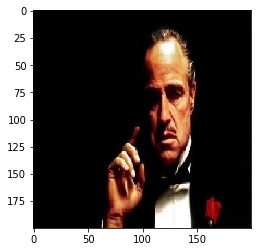

In [110]:
predictoneimage_cnn(model, 'godfather.jpg')

Sad


(array([[0.00466, 0.00003, 0.00999, 0.02709, 0.85452, 0.00072, 0.10298]],
       dtype=float32), None)

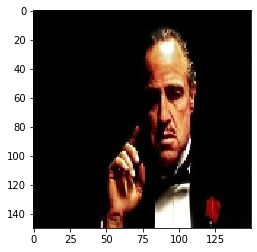

In [34]:
predicttwo(model2, 'godfather.jpg')

Sad


(array([[0., 0., 0., 0., 1., 0., 0.]], dtype=float32), None)

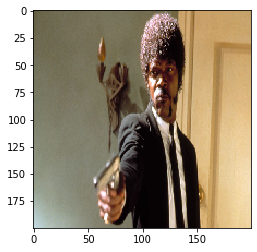

In [111]:
predictoneimage_cnn(model, 'pulp.jpg')

Scared


(array([[0.48571, 0.00008, 0.50986, 0.00082, 0.00274, 0.00045, 0.00034]],
       dtype=float32), None)

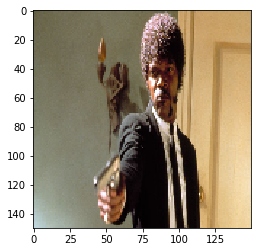

In [35]:
predicttwo(model2, 'pulp.jpg')

Surprised


(array([[0.     , 0.     , 0.     , 0.     , 0.30264, 0.69736, 0.     ]],
       dtype=float32), None)

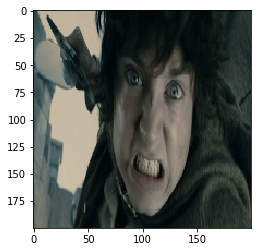

In [112]:
predictoneimage_cnn(model, 'frodo1.jpg')

Scared


(array([[0.03313, 0.00614, 0.68263, 0.02417, 0.19013, 0.04019, 0.02359]],
       dtype=float32), None)

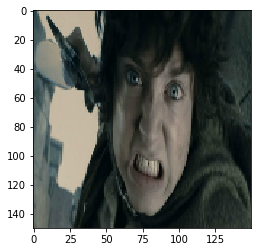

In [36]:
predicttwo(model2, 'frodo1.jpg')

Sad


(array([[0., 0., 0., 0., 1., 0., 0.]], dtype=float32), None)

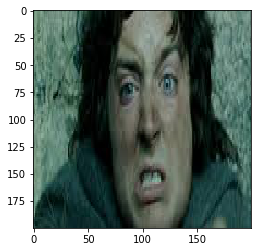

In [113]:
predictoneimage_cnn(model, 'frodo2.jpg')

Scared


(array([[0.00888, 0.00004, 0.97459, 0.00007, 0.01369, 0.00145, 0.00128]],
       dtype=float32), None)

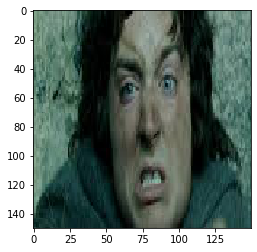

In [37]:
predicttwo(model2, 'frodo2.jpg')

Happy


(array([[0.     , 0.     , 0.     , 0.99581, 0.00419, 0.     , 0.     ]],
       dtype=float32), None)

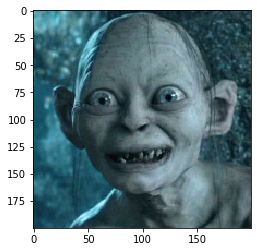

In [114]:
predictoneimage_cnn(model, 'gollum.jpg')

Neutral


(array([[0.03372, 0.00008, 0.01319, 0.11188, 0.01001, 0.00139, 0.82973]],
       dtype=float32), None)

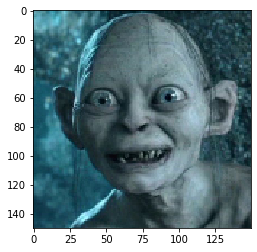

In [38]:
predicttwo(model2, 'gollum.jpg')

Surprised


(array([[0.    , 0.    , 0.    , 0.    , 0.0028, 0.9972, 0.    ]],
       dtype=float32), None)

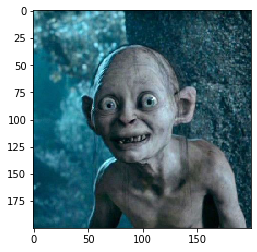

In [115]:
predictoneimage_cnn(model, 'gollum1.jpg')

Sad


(array([[0.03611, 0.00639, 0.24347, 0.2424 , 0.40981, 0.00848, 0.05334]],
       dtype=float32), None)

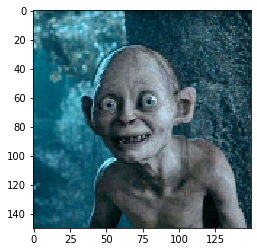

In [39]:
predicttwo(model2, 'gollum1.jpg')

Scared


(array([[0.00085, 0.     , 0.9545 , 0.     , 0.00002, 0.00926, 0.03537]],
       dtype=float32), None)

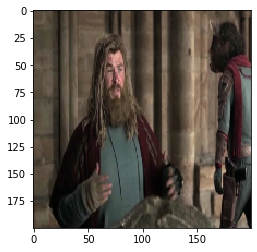

In [116]:
predictoneimage_cnn(model, 'thor.jpg')

Sad


(array([[0.     , 0.     , 0.00037, 0.     , 0.9996 , 0.     , 0.00004]],
       dtype=float32), None)

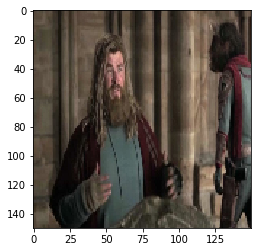

In [40]:
predicttwo(model2, 'thor.jpg')

Sad


(array([[0., 0., 0., 0., 1., 0., 0.]], dtype=float32), None)

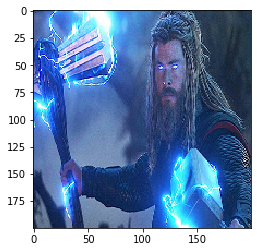

In [117]:
predictoneimage_cnn(model, 'thor1.jpg')

Sad


(array([[0.08297, 0.0011 , 0.12392, 0.2066 , 0.33642, 0.03787, 0.21113]],
       dtype=float32), None)

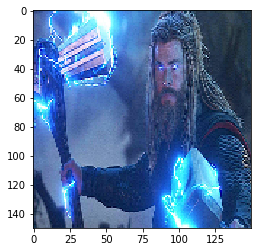

In [41]:
predicttwo(model2, 'thor1.jpg')

In [14]:
img = cv2.imread('godfather.jpg')

cv2.namedWindow('img', cv2.WINDOW_AUTOSIZE)
cv2.imshow('img',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

Sad


(array([[0., 0., 0., 0., 1., 0., 0.]], dtype=float32), None)

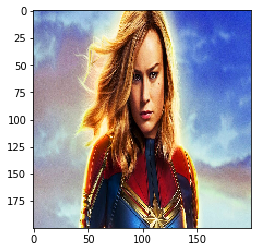

In [118]:
predictoneimage_cnn(model, 'capmarvel.jpg')

Angry


(array([[0.31192, 0.0033 , 0.28856, 0.01504, 0.27539, 0.00547, 0.10032]],
       dtype=float32), None)

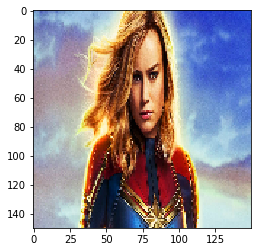

In [42]:
predicttwo(model2, 'capmarvel.jpg')